<h1>Gradient Descent</h1>

In my notes on neural networks, I realized that I haven't given much justice to describing gradient descent. So, I decided to create a separate notebook where I describe gradient descent and its many variations.

<h2>Concept</h2>

The concept behind gradient descent is that given a convex functions (where the global minima are the local minima), we can find the minimum iteratively by computing the *gradient* of that function at specific points. Given a cost function, $J$, we can minimize it using the equation:

$$w \rightarrow w' = w - \eta \nabla_w J(x) $$

where $w$ is a column vector of weights and $x$ is a column vector of the input features. $\eta$ is a learning rate which is a hyperparameter that we adjust. Let's assume we have an equation of the form:

$$w_1x_1 + w_2x_2 + ... + w_n = w^Tx$$

(the last entry in the vector $x$ is 1). Then, given an appropriate cost function, we can find the vector $w$ such that $w^Tx = \hat{y} \approx y$. For now, we will define the cost function as the mean-squared error (MSE) function:

$$J(x) = \frac{1}{2n} \sum_{i=1}^n \parallel \hat{y}^i - y^i \parallel^2 = \frac{1}{2n} \sum_{i=1}^n \parallel w^Tx^i - y^i \parallel^2$$

where $n$ is the number of examples. The entries for the gradient of this function $\nabla_w J(x)$ is:

$$\frac{\partial J}{\partial w_j} = \frac{1}{n} \sum_{i=1}^{n} \parallel \hat{y}^i - y^i \parallel x^i_j$$

<h2>Example</h2>

In order to demonstrate gradient descent, let's create some sample data and then write the gradient descent algorithm. First, let's write the boilerplate to generate the sample data:


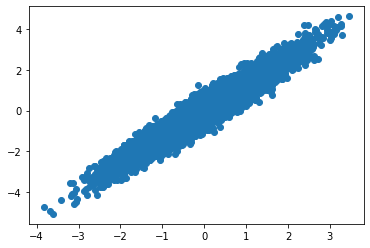

In [123]:
import time
import numpy as np
import matplotlib.pyplot as plt

def generate_rand_func(n: int, d: int):
    x = np.random.randn(n, d, 1)
    w = np.random.randn(d, 1)
    y = np.dot(w.T, x)
    return (y.reshape(n, 1), x, w)

def cost(y, w, x):
    return sum([ np.linalg.norm((np.dot(w.T, x[i]) - y[i, 0]))**2 for i in range(0, x.shape[0]) ]) / (2*x.shape[0])

(y, x, w) = generate_rand_func(10000, 2)
plt.scatter(x[:, 0], y)

The above generates some data and then graphs it. As you can see, there's a strong linear correlation in the data. Now, we implement *batch gradient descent*, which operates on the entire dataset:

Took 18.988931681000395 seconds
J(x) = 0.0001047599344282625


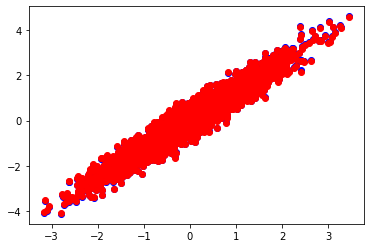

In [125]:
def gradient_descent(y, x, eta: float, niters: int):
    (n, d) = (x.shape[0], x.shape[1])
    w = np.random.randn(d, 1)
    for m in range(0, niters):
        nabla_J = np.zeros((d, 1), dtype=float)
        for j in range(0, nabla_J.shape[0]):
            s = 0.0
            for i in range(0, n):
                s += (np.dot(w.T, x[i]) - y[i, 0]) * x[i, j]
            nabla_J[j, 0] = s/n
        w = w - eta * nabla_J
    return w

split = int(0.7*x.shape[0])
start = time.perf_counter()
w = gradient_descent(y[:split], x[:split], 0.05, 100)
end = time.perf_counter()
plt.scatter(x[split:, 0], y[split:], c='b') # Test data: blue
plt.scatter(x[split:, 0], [np.dot(w.T, x[i]) for i in range(split, x.shape[0])], c='r') # Predictions: red
print('Took {} seconds'.format(end-start))
print('J(x) = {}'.format(cost(y, w, x)))